# https://www.kaggle.com/c/digit-recognizer/
# with keras + simple deep network, scored 0.9785714285714285

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [45]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

def flush_predictons(predictions, output_name='out.csv'):
    '''
    predictions is a np.array of int 
    '''
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv(output_name, index = False)
    
x_train, y_train, pred_test = load_data()

In [46]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

/Users/vincent/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 784) (33600,) (8400, 784) (8400,)


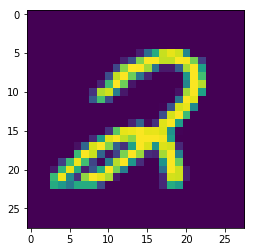

In [48]:
plt.imshow(x_train[4].reshape(28, 28))

In [49]:
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [50]:
# data preprocessing for keras
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')/255
x_test  = x_test.reshape(x_test.shape[0], 784).astype('float32')/255

In [51]:
batch_size = 128
num_classes = 10
epochs = 20

In [52]:
# one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 3s 77us/step - loss: 0.3344 - acc: 0.8959 - val_loss: 0.1716 - val_acc: 0.9475
Epoch 2/20
33600/33600 [==============================] - 2s 70us/step - loss: 0.1370 - acc: 0.9580 - val_loss: 0.1330 - val_acc: 0.9611
Epoch 3/20
33600/33600 [==============================] - 2s 69us/step - loss: 0.0952 - acc: 0.9706 - val_loss: 0.1097 - val_acc: 0.9676
Epoch 4/20
33600/33600 [==============================] - 2s 70us/step - loss: 0.0717 - acc: 0.9774 - val_loss: 0.1014 - val_acc: 0.9717
Epoch 5/20
33600/33600 [==============================] - 2s 68us/step - loss: 0.0583 - acc: 0.9814 - val_loss: 0.0952 - val_acc: 0.9746
Epoch 6/20
33600/33600 [==============================] - 2s 69us/step - loss: 0.0474 - acc: 0.9850 - val_loss: 0.1017 - val_acc: 0.9758
Epoch 7/20
33600/33600 [==============================] - 2s 71us/step - loss: 0.0386 - acc: 0.9878 - val_loss: 0.1029 - val_acc:

In [55]:
pred_test = pred_test.reshape(pred_test.shape[0], 784).astype('float32')/255
pred = model.predict_classes(pred_test)